In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

from scipy.cluster.hierarchy import dendrogram


In [15]:
df = pd.read_csv("../../glass-clustering.csv")

In [16]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [17]:
df.shape

(214, 9)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


In [19]:
scaler = StandardScaler()

In [20]:
scaled_df = scaler.fit_transform(df)

In [21]:
model = Birch()

In [22]:
cluster_labels = model.fit_predict(scaled_df)

In [23]:
df['labels'] = cluster_labels
pred = cluster_labels

In [24]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,labels
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


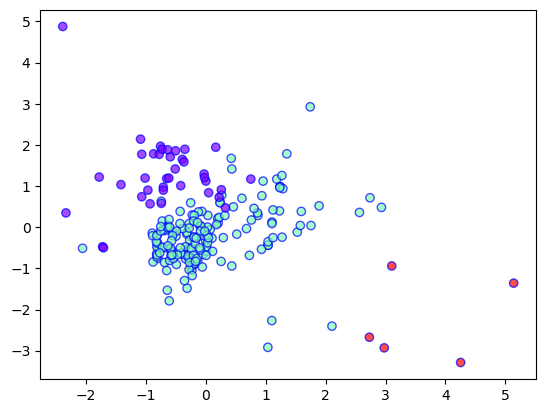

In [25]:
dataset = scaled_df
plt.scatter(dataset[:, 0], dataset[:, 1], c = pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.show()

In [26]:
print(F"Silhoutte Scores : {silhouette_score(scaled_df,cluster_labels)} ")
print(F"Davies Bouldin Scores : {davies_bouldin_score(scaled_df,cluster_labels)} ")
print(F"Calinski Harabasz Scores : {calinski_harabasz_score(scaled_df,cluster_labels)} ")

Silhoutte Scores : 0.4005241779456873 
Davies Bouldin Scores : 1.2392649063234262 
Calinski Harabasz Scores : 44.0682035212826 
